## VII. Simulation Of Discrete Time Queue

Simulate the discrete time queue of problem II over $10^6$ slots using $\mu= 3/4$ and $a_0 = 7/10$, $a_1 = a_2 = a_3 = 1/10$.
Compare the theoretical value $p_k$ to the simulated value $\frac{1}{T}\sum^{T−1}_{t=0}1_{\{Q(t)=k\}}$ for $T \in \{10, 10^2, 10^3, 10^4, 10^5, 10^6\}$ and $k\in\{0, 1, 2, 3, 4\}$.



In [1]:
import numpy as np
#import random
import pandas as pd  #pandas for dataframes
import matplotlib.pyplot as plt

In [2]:
ak=[7/10,1/10,1/10,1/10]
mu=3/4
lam=0
for  i in range(4):
    lam=lam+i*ak[i]
lam

0.6000000000000001

We have $Q(0) = 0$ and
$$Q(t + 1) = \max \{Q(t) - S(t), 0\} + A(t) \qquad \forall t \geq 0$$
where 
$$P[A(t) = k] = a_k \quad \forall k \in \{0,1,2,3\}$$
$$P[S(t) = 1] = \mu \quad P[S(t) = 0] = 1-\mu$$
Define $\lambda = \mathbb{E}[A(t)]=\sum_{k=0}^{\infty}ka_k$. 

1)  $\lim_{t\rightarrow \infty} P[Q(t) = k] = p_k$ steady-state pmf

2) $p_0 = 1-\frac{\lambda}{\mu}$

First, let $T=10$ to see an example of $Q(t+1)$ as a vector in terms of a given $A(t)$ and $S(t)$.

In [3]:
T=10
A=np.random.choice(np.arange(0, 4), p=ak,size=(T))
S=np.random.choice(np.arange(2), p=[1-mu,mu],size=(T))
Q=[0]
for i in range(0,T-1):
    Qtf=max(Q[i]-S[i],0)+A[i]
    Q=np.append(Q,Qtf)
print("Q=",Q)
print("A=",A)
print("S=",S)

Q= [0 0 3 4 4 3 2 1 0 3]
A= [0 3 2 1 0 0 0 0 3 0]
S= [1 0 1 1 1 1 1 1 1 1]


So let's generalize with a function that give us the $Q$ packets given the number $T$.

In [4]:
#We made a vector 'P_sim' of the simulated pmf
def P_sim(T):
    A=np.random.choice(np.arange(0, 4), p=ak,size=(T))
    S=np.random.choice(np.arange(2), p=[1-mu,mu],size=(T))
    Q=[0]
    for i in range(0,T-1):
        Qtf=max(Q[i]-S[i],0)+A[i]
        Q=np.append(Q,Qtf)
        
    P_simul=[]
    for i in range(T):
        Q_bool = (Q==i)             #boolean matrix {Q(t)=i}
        I_Q = Q_bool.astype(np.int)  #indicator {Q(t)=i}
        P_simul=np.append(P_simul,sum(I_Q)/T)    
    return A, Q, P_simul

A,Q,Psim=P_sim(10)
print("A = ",A)
print("Q = ",Q)
print("p_k simulated",Psim)

A =  [0 3 0 3 0 3 0 1 1 0]
Q =  [0 0 3 2 4 3 5 5 6 6]
p_k simulated [0.2 0.  0.1 0.2 0.1 0.2 0.2 0.  0.  0. ]


The theoretical pmfs are
$$\boxed{p_0 = 1-\frac{\lambda}{\mu}\qquad p_1=\frac{\left(1-\frac{\lambda}{\mu}\right)(1-a_0)}{\mu a_0}.}$$ 

$$\boxed{p_{k+1}=\frac{p_k-a_kp_0-\sum_{i=1}^{k}p_i[(1-\mu)a_{k-i}+\mu a_{k+1-i}]}{\mu a_0} \qquad \text{ for }k\geq 2}$$

Let's make a program to evaluate this theoretical pmfs

In [5]:
p0=1-lam/mu
p1=p0*(1-ak[0])/(mu*ak[0])

#the vector 'P' is a theoretical pmf
def P_theo(T):
    P=[p0,p1] 
    a=np.append(ak,np.zeros(T-4))#a vector full of ak that is zero for k>3
    for k in range(1,T-1):
        sumtot=0
        for i in range(1,k+1):
            sumtot+=P[i]*((1-mu)*a[k-i]+mu*a[k+1-i])
        Pf=(P[k]-a[k]*p0-sumtot)/(mu*a[0])
        P=np.append(P,Pf)
    return P
T=10
Ptheo=P_theo(T)
print("p_k theoretical = ",Ptheo)

p_k theoretical =  [0.2        0.11428571 0.12517007 0.11895044 0.08622333 0.07123487
 0.0567229  0.04537637 0.03634461 0.02908125]


In [6]:
# Create a pandas DataFrame 
data = {'k(T=10)':[0,1,2,3,4,5,6,7,8,9],
        '$p_k$ Simulated':Psim,
       '$p_k$ Theoretical':Ptheo}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,k(T=10),$p_k$ Simulated,$p_k$ Theoretical
0,0,0.2,0.200000
1,1,0.0,0.114286
2,2,0.1,0.125170
3,3,0.2,0.118950
4,4,0.1,0.086223
5,5,0.2,0.071235
6,6,0.2,0.056723
7,7,0.0,0.045376
8,8,0.0,0.036345
9,9,0.0,0.029081


In [7]:
P0s=[]#Vector of simulated p0 for different T 
P0t=[]#Vector of theoretical p0 for different T 

for i in range(1,7):
    A,Q,Psim=P_sim(10^i)
    P0s=np.append(P0s,Psim[1])
    
for i in range(1,7):
    P0t=np.append(P0t,P_theo(10^i)[1])
    
# Create a pandas DataFrame 
data = {'$T$ ':[10,100,1000,10000,100000,1000000],
        '$p_1$ Simulated':P0s,
        '$p_1$ Theoretical':P0t} 
# Create DataFrame
df = pd.DataFrame(data)
df

,$T$,$p_1$ Simulated,$p_1$ Theoretical
0,10,0.090909,0.114286
1,100,0.000000,0.114286
2,1000,0.222222,0.114286
3,10000,0.071429,0.114286
4,100000,0.200000,0.114286
5,1000000,0.000000,0.114286


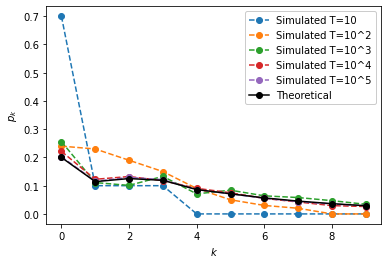

In [8]:
A,Q,Psim1=P_sim(10)
A,Q,Psim2=P_sim(100)
A,Q,Psim3=P_sim(1000)
A,Q,Psim4=P_sim(10000)
A,Q,Psim5=P_sim(100000)

x = [0,1,2,3,4,5,6,7,8,9]
plt.plot(x, Psim1,'--o',label='Simulated T=10')
plt.plot(x, Psim2[0:10],'--o',label='Simulated T=10^2')
plt.plot(x, Psim3[0:10],'--o',label='Simulated T=10^3')
plt.plot(x, Psim4[0:10],'--o',label='Simulated T=10^4')
plt.plot(x, Psim5[0:10],'--o',label='Simulated T=10^5')

plt.plot(x, P_theo(10),'-ok',label='Theoretical')
plt.legend(framealpha=1, frameon=True);
plt.ylabel('$p_k$')
plt.xlabel('$k$')
plt.show()

From the plot we observe that as $T$ increases or $k$ increases, the simulated mass function approximates to the theoretical one.

b) It can be shown that steady state queue size for the system is (with prob 1):

$$\mathbb{E}[Q] = \lim_{T\rightarrow \infty} \sum_{t=0}^{T-1}Q(t) = \frac{\mathbb{E}[A^2]+\lambda-2\lambda^2}{2(\mu-\lambda)}$$

where $A = A(0)$. Compare this exact value with $\frac{1}{T} \sum^{T−1}_{t=0} Q(t)$ for $T \in \{10, 10^2, 10^3, 10^4, 10^5, 10^6\}$.

In [9]:
def ApproxE(Q,t):
    ApE=sum(Q)/t 
    return ApE

def ExactE(A,t):
    ExE=((sum(A*A)/t)+lam-2*lam**2)/(2*(mu-lam)) 
    return ExE

Ap_E=[]#Vector of Approx Expectation 
Ex_E=[]#Vector of Exact Expectation

for i in range(1,6):
    t=10**i
    A,Q,Psim=P_sim(t)
    Ap_E=np.append(Ap_E,ApproxE(Q,t))
    Ex_E=np.append(Ex_E,ExactE(A,t))
    
# Create a pandas DataFrame 
data = {'$T$ ':[10,100,1000,10000,100000],
        'Simulated Expectation':Ap_E,
        'Theoretical Expectation':Ex_E} 
# Create DataFrame
df = pd.DataFrame(data)
df

,$T$,Simulated Expectation,Theoretical Expectation
0,10,3.20000,9.933333
1,100,1.42000,3.033333
2,1000,2.50300,3.820000
3,10000,4.85360,4.323667
4,100000,4.18154,4.278300
